# Input Parameters

In [1]:
#source ISvenv/bin/activate (launching and exiting the virtual environment containing the required modules, stored in the working directory)
#ISvenv/bin/python your_script.py - for running a script in the virtual environment
#source deactivate - to deactivate the virtual environment

#import all the libraries needed
from import_dep import *

# import the class that imports the IS data
from IS_Import import ISdata, ImpedanceData, AgilentIS, SolatronIS
from IS_Functions import IS_plot, run_to_dict, update_plot_string


# import custom plot style and colorbar functions
from plot_style import set_plot_style

# Define the path to the root directory containing the IS Data 
root_IS_Agilent = '/Users/horatiocox/Desktop/RUG_postdoc/UCL PostDoc/Experiments/Groningen'
root_IS_solatron = '/Users/horatiocox/Desktop/RUG_postdoc/UCL PostDoc/Experiments/Solatron/Combined_Analysis'

# Define the path to the output directory to save the data
output_IS_solatron = '/Users/horatiocox/Desktop/RUG_postdoc/UCL PostDoc/Experiments/Solatron/Combined_Analysis/Output/'

# Export settings
fig_format = 'png' # format of the figure to be saved
plot_transparency = True # set to True to export plots with transparency
export_data = True # set to True to export the data to figures and a powerpoint presentation and save to path_out
fig_list = [] # Create a list to flexibly store tuples with the (figure, plot title) for later exporting


# Custom Scence style settings for figures which returns a figure size to pass to plotting functions if needed
fig_size = set_plot_style(export_data = export_data, use_tex=True)
#plt.style.use(['science', 'grid', 'nature'])




# Import All Data
- This stores a class object which contains the data in "measurements"
- "measurements" is a dictionary with a key: and a ISdata object containing impedance data
- e.g. print(dev_J.measurements.keys())
- measurements is an iter object so "for measurements in dev_J" loops over the ISdata objects in the dict
- measurements also has a __getitem__ meaning that dev_J[0] indexes the first item in the dict (the first ISdata object)

- Here I am using run_to_dict to put all data into a dict where dict[6] contains a list of all the run 6 data

In [2]:
%%capture
#import all solatron data from combined folder
all_data_solatron = SolatronIS(root_IS_solatron, 'All_data')

# loop through the imported data and put all measurements with the same run number into a list
# With each list containing the data for a single run put into a dictionary
solatron = run_to_dict(all_data_solatron)

### DC Offset Causing Instability in Memristive State
- Run 5: DC = -1:0.1:1, 50mV AC, 32MHz, Ambient
- NOTE: this is BEFORE the Au contact issue was realised

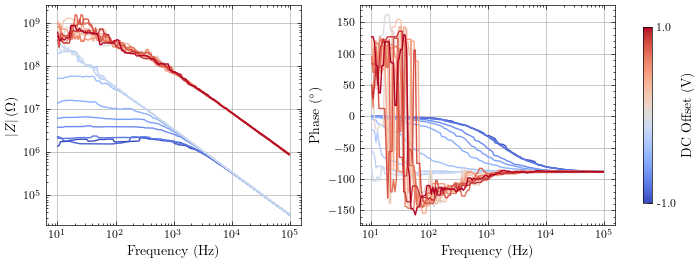

In [ ]:
# Select data 
d5 = [solatron[5]]

# Plot labels
plot_labels = ['wb1, pristine, ambient']

# if export true, update the plot string
d5 = update_plot_string(d5, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot(d5, d_type='Zabsphi', freq_lim=[1e1, 1e5],
                    sort_data=False, c_bar=2, fig_size=fig_size, med_filt = 7, force_key = False)

# append the figure and title to the list for later exporting
fig_list.append((fig, 'run5DCinstability')) 

# Pristine

### Wirebond 3: Ambient vs Vacuum
- run 51: wirebond3, ambient
- run 52: wirebond3, vacuum

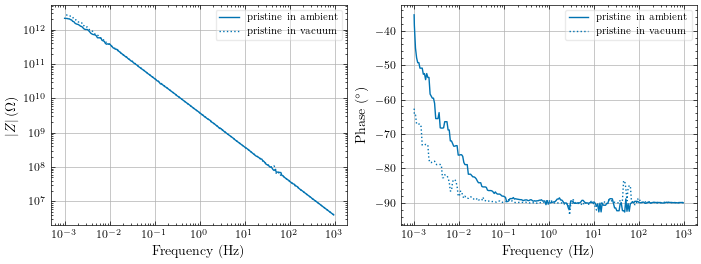

In [ ]:
# Select data 
d51 = [solatron[51], solatron[52]]

# Plot labels
plot_labels = ['wb3, pristine, ambient', 'wb3, pristine, vacuum']

# if export true, update the plot string
d51 = update_plot_string(d51, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot(d51, d_type='Zabsphi', freq_lim=[0, 1e3],
                    sort_data=False, c_bar=0, fig_size=fig_size, med_filt = 3, force_key = False)

# append the figure and title to the list for later exporting
fig_list.append((fig, 'pristine_ambvac_wb3')) 

### Wirebond 4: Ambient vs Vacuum with V_rms varied
- run 55: wirebond4, ambient
- run 56: wirebond4, vacuum
- run 58: wirebond4, vacuum
- run 59: wirebond4, ambient

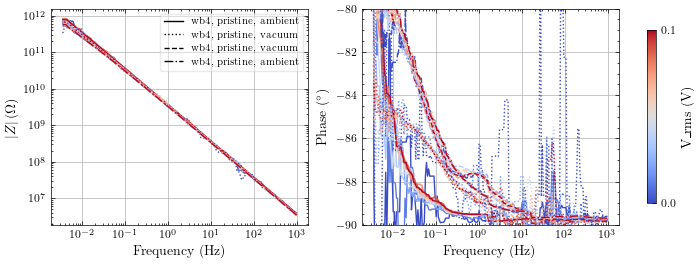

In [5]:
# Select data 
d55 = [solatron[55], solatron[56], solatron[58], solatron[59]]

# Plot labels
plot_labels = ['wb4, pristine, ambient', 'wb4, pristine, vacuum', 'wb4, pristine, vacuum', 'wb4, pristine, ambient']

# if export true, update the plot string
d55 = update_plot_string(d55, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot(d55, d_type='Zabsphi', freq_lim=[0, 1e3], y_lim_right=[-90, -80],
                    sort_data=False, c_bar=3, fig_size=fig_size, med_filt = 9, force_key = False)

# append the figure and title to the list for later exporting
fig_list.append((fig, 'pristine_ambvac_Vrms_wb4')) 

### Wirebond 4/Wirebond 3: Ambient vs Vacuum with $V_{DC}$
- r60 = wirebond4, vac
- r61 = wirebond4, ambient
- r62 = wirebond3, ambient
- r63 = wirebond3, vac

- Notice that the wirebond 3 has zero phase and infinite resistance
    - This will later prove that **this device won't form**

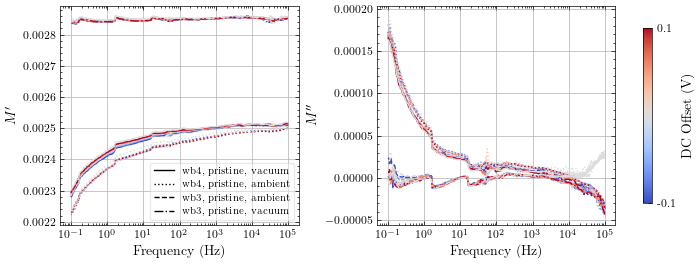

In [6]:
# Select data 
d60 = [solatron[60], solatron[61],solatron[62], solatron[63]]

# Plot labels
plot_labels = ['wb4, pristine, vacuum', 'wb4, pristine, ambient', 'wb3, pristine, ambient', 'wb3, pristine, vacuum']

# if export true, update the plot string
d60 = update_plot_string(d60, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot(d60, d_type='modulus', freq_lim=[1e-1, 1e5], y_lim_right=None,
                    sort_data=False, c_bar=2, fig_size=fig_size, med_filt = 9, force_key = False)

# append the figure and title to the list for later exporting
fig_list.append((fig, 'pristine_ambvac_Vdc_wb4wb3')) 

# Exporting

### Exporting All Figures as Individual Files

In [7]:
if export_data:
    for fig_obj, fig_name in fig_list:
        save_path = Path(output_IS_solatron) / Path(f"{fig_name}.{fig_format}")
        fig_obj.savefig(save_path, dpi=600, bbox_inches='tight', transparent=plot_transparency)